# 1 Data preparation

In [224]:
import pandas as pd
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import folium
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from math import radians, sin, cos, sqrt, atan2
from geopy.distance import great_circle
from sklearn.model_selection import train_test_split

In [225]:
df=pd.read_csv('amended data.csv')

In [226]:
median=df['price'].median()
print(df['price'].median())

64000.0


In [227]:
df.loc[df['price']>median,'price_class']=1
df.loc[df['price']<=median,'price_class']=0

In [228]:
# Make variable Daugava_bank a numemic one
mapping={'right_bank':1, 'Pardaugava':0}
df['Daugava_bank']=df['Daugava_bank'].map(mapping)
df['Daugava_bank'].unique()

KeyError: 'Daugava_bank'

# 1.1 Create new binary variable - Is it Center?

In [229]:
df['center']=df['district'].apply(lambda x:1 if x in ('centrs','Vecrīga')else 0)

df['center'].unique()

array([1, 0], dtype=int64)

# 1.2 Create a couple of binary variables from the field facilities

In [230]:
value_counts=df['facilities'].value_counts()
print(value_counts)

Parkošanas vieta                              650
Lodžija                                       400
Lodžija, Parkošanas vieta                     370
Balkons                                       290
Balkons, Parkošanas vieta                     232
Terase, Parkošanas vieta                       76
Terase                                         52
Balkons, Lodžija, Parkošanas vieta             38
Balkons, Lodžija, Terase, Parkošanas vieta     21
Balkons, Terase, Parkošanas vieta              21
Balkons, Lodžija                               15
Lodžija, Terase, Parkošanas vieta               6
Pirts, Parkošanas vieta                         5
Lodžija, Terase                                 4
Terase, Pirts                                   3
Balkons, Lodžija, Terase                        1
Name: facilities, dtype: int64


In [231]:
df['facilities']=df['facilities'].fillna('-1')

In [232]:
def Parking(value):
    return 1 if "Parkošanas vieta" in value else 0

df['parking']= df['facilities'].apply(lambda x: Parking(x))

In [233]:
def balcony(value):
    if "Balkons" in value:
        return 1
    elif "Lodžija" in value:
        return 1
    elif "Terase" in value:
        return 1
    else:
        return 0

df['balcony']= df['facilities'].apply(lambda x: balcony(x))

In [234]:
df=df.rename(columns={'len':'lat'})

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3356 entries, 0 to 3355
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           3356 non-null   int64  
 1   district             3356 non-null   object 
 2   data_street          3356 non-null   object 
 3   rooms                3356 non-null   int64  
 4   area                 3356 non-null   float64
 5   price                3356 non-null   int64  
 6   cur_floor            3356 non-null   int64  
 7   total_floor          3356 non-null   int64  
 8   lift                 3356 non-null   int64  
 9   seria                3356 non-null   object 
 10  house_type           3356 non-null   object 
 11  facilities           3356 non-null   object 
 12  lat                  3356 non-null   float64
 13  lon                  3356 non-null   float64
 14  price_per_sqm        3356 non-null   float64
 15  floor                3356 non-null   i

# 1.3 Fill in missing coordinates (lat and lon)

In [236]:
Properties_with_missing_coordinates=df[df['lon']==-1]
print(Properties_with_missing_coordinates)

      Unnamed: 0 district              data_street  rooms  area   price  \
485          485     Cits             Lomonosova 2      1  22.0   25000   
1400        1400     Cits              Dīķu iela 2      4  74.0   21850   
1968        1968   Imanta  Anniņmuižas bulvāris 41      2  66.0  132000   

      cur_floor  total_floor  lift    seria  ... floor house_seria_general  \
485           1            4     0  P. kara  ...     1  Pre_war_apartments   
1400          3            3     0  Specpr.  ...     3   Serial_apartments   
1968         23           24     1    Jaun.  ...    23        New_projects   

      floor_total                  street          street_name  street_number  \
485         1 / 4            Lomonosova 2           Lomonosova              2   
1400        3 / 3             Dīķu iela 2            Dīķu iela              2   
1968      23 / 24  Anniņmuižasbulvāris 41  Anniņmuižasbulvāris             41   

     price_class center parking balcony  
485          0.0   

In [237]:
row_index=485
new_lat_1=56.938252644826655
new_lon_1=24.156020097221585
df.at[row_index,'lat']= new_lat_1
df.at[row_index,'lon']= new_lon_1

row=df.loc[df['Unnamed: 0']==485][['lat','lon']]
print(row)

           lat       lon
485  56.938253  24.15602


In [238]:
row_index=1400
new_lat_2=56.919847492216206
new_lon_2=24.086959281878208
df.at[row_index,'lat']= new_lat_2
df.at[row_index,'lon']= new_lon_2

row=df.loc[df['Unnamed: 0']==1400][['lat','lon']]
print(row)

            lat        lon
1400  56.919847  24.086959


In [239]:
row_index=1968
new_lat_3=56.95920121755761
new_lon_3=24.01384986838741
df.at[row_index,'lat']= new_lat_3
df.at[row_index,'lon']= new_lon_3

row=df.loc[df['Unnamed: 0']==1986][['lat','lon']]
print(row)

            lat        lon
1986  56.916259  24.093464


In [240]:
df.to_excel('check.xlsx', index=False)

PermissionError: [Errno 13] Permission denied: 'check.xlsx'

# 1.4 Drop non-numeric variables

In [241]:
df=df.drop(['Unnamed: 0','district', 'street','data_street', 'seria','house_type','facilities','price_per_sqm','house_seria_general','floor_total','street_name','street_number', 'rooms'],axis=1)

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3356 entries, 0 to 3355
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   area         3356 non-null   float64
 1   price        3356 non-null   int64  
 2   cur_floor    3356 non-null   int64  
 3   total_floor  3356 non-null   int64  
 4   lift         3356 non-null   int64  
 5   lat          3356 non-null   float64
 6   lon          3356 non-null   float64
 7   floor        3356 non-null   int64  
 8   price_class  3356 non-null   float64
 9   center       3356 non-null   int64  
 10  parking      3356 non-null   int64  
 11  balcony      3356 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 314.8 KB


# 2 Decision tree model versions

# 2.1 Test model version 1

# 2.1.2 Split df into training and validation sets

In [243]:
df_train, df_valid=train_test_split(df,test_size=0.25,random_state=11111)

In [244]:
features_train=df_train.drop(['price', 'price_class'], axis=1)
target_train=df_train['price_class']

features_valid=df_valid.drop(['price', 'price_class'], axis=1)
target_valid=df_valid['price_class']

In [245]:
print(features_train.shape)
print(target_train.shape)

(2517, 10)
(2517,)


In [246]:
print(features_valid.shape)
print(target_valid.shape)

(839, 10)
(839,)


# 2.1.3 Get accuracy for model version 1

In [247]:
model = DecisionTreeClassifier(random_state=11111)
 
model.fit(features_train, target_train)

predictions = model.predict(features_valid)

In [248]:
from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(target_valid, predictions) 
accuracy

0.865315852205006

# 2.2 Test model version 2

# 2.2.1 Calculate new variable - distance from center

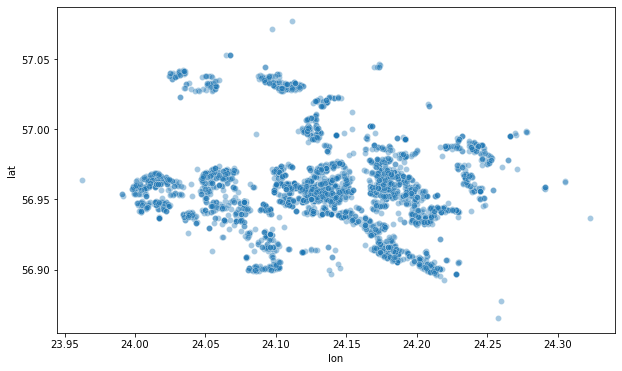

In [249]:
plt.figure(figsize = (10, 6))
ax = sns.scatterplot(x = 'lon', y = 'lat', data = df, hue = None, alpha=0.4)
plt.show()

In [250]:
# Define the central point as a tuple of (latitude, longitude)
central_point = (56.951599754910994, 24.113290094982993)  # Note that order is (lat, lon)

# Define a function to calculate the distance
def calculate_distance(row):
   obj_point = (row['lat'], row['lon'])
   return great_circle(central_point, obj_point).km

# Apply the function to create a new column 'distance_to_center_km'
df['distance_to_center_km'] = df.apply(calculate_distance, axis=1)

In [251]:
df['distance_to_center_km'].describe()

count    3356.000000
mean        4.541350
std         2.592722
min         0.164168
25%         2.280484
50%         4.402195
75%         6.133299
max        13.920236
Name: distance_to_center_km, dtype: float64

# 2.2.2  Split df into training and validation sets

In [252]:
df_train, df_valid=train_test_split(df,test_size=0.25,random_state=11111)

features_train=df_train.drop(['price', 'price_class'], axis=1)
target_train=df_train['price_class']

features_valid=df_valid.drop(['price', 'price_class'], axis=1)
target_valid=df_valid['price_class']

# 2.2.3 Get accuracy for model version 2

In [253]:
model = DecisionTreeClassifier(random_state=11111)
 
model.fit(features_train, target_train)

predictions = model.predict(features_valid)

In [254]:
from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(target_valid, predictions) 
accuracy

0.8545887961859356

# 2.3 Test model version 3

# 2.3.1 Add new variable - Distance from airport

In [255]:
# Define the central point as a tuple of (latitude, longitude)
central_point = (56.92200101647137, 23.97974797600975)  # Note that order is (lat, lon)

# Define a function to calculate the distance
def calculate_distance(row):
   obj_point = (row['lat'], row['lon'])
   return great_circle(central_point, obj_point).km

# Apply the function to create a new column 'distance_to_center_km'
df['distance_to_airport_km'] = df.apply(calculate_distance, axis=1)

In [256]:
df['distance_to_airport_km'].describe()

count    3356.000000
mean       10.677960
std         3.568868
min         2.543634
25%         8.188713
50%        10.811472
75%        13.426344
max        20.869786
Name: distance_to_airport_km, dtype: float64

# 2.3.2 Split df into training and validation sets

In [257]:
df_train, df_valid=train_test_split(df,test_size=0.25,random_state=11111)

features_train=df_train.drop(['price', 'price_class'], axis=1)
target_train=df_train['price_class']

features_valid=df_valid.drop(['price', 'price_class'], axis=1)
target_valid=df_valid['price_class']

# 2.3.3 Get accuracy for model version 3

In [258]:
model = DecisionTreeClassifier(random_state=11111)
 
model.fit(features_train, target_train)

predictions = model.predict(features_valid)

In [259]:
from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(target_valid, predictions) 
accuracy

0.8617401668653158

# 2.4 Changing hyperparameters

In [260]:
accuracy_array = []
best_model = None
best_result = 0

for depth in range(1, 24):
    model = DecisionTreeClassifier(random_state=11111, max_depth=depth)
    model.fit(features_train, target_train)
    
    predictions_valid = model.predict(features_valid)
    result = accuracy_score(target_valid, predictions_valid)

    if result > best_result:
        best_result = result
        
    print('max_depth =', depth,': ', end='')
    print(result)

    accuracy_array.append([depth, result])
    
df_ac = pd.DataFrame(accuracy_array, columns=['depth', 'accuracy'])
print('')
print('best result :', best_result)

max_depth = 1 : 0.799761620977354
max_depth = 2 : 0.8355184743742551
max_depth = 3 : 0.8426698450536353
max_depth = 4 : 0.8557806912991657
max_depth = 5 : 0.8510131108462455
max_depth = 6 : 0.865315852205006
max_depth = 7 : 0.8605482717520858
max_depth = 8 : 0.8605482717520858
max_depth = 9 : 0.8569725864123957
max_depth = 10 : 0.8557806912991657
max_depth = 11 : 0.8569725864123957
max_depth = 12 : 0.8533969010727056
max_depth = 13 : 0.8617401668653158
max_depth = 14 : 0.8617401668653158
max_depth = 15 : 0.8569725864123957
max_depth = 16 : 0.8569725864123957
max_depth = 17 : 0.8533969010727056
max_depth = 18 : 0.8617401668653158
max_depth = 19 : 0.8581644815256257
max_depth = 20 : 0.867699642431466
max_depth = 21 : 0.8617401668653158
max_depth = 22 : 0.8617401668653158
max_depth = 23 : 0.8617401668653158

best result : 0.867699642431466


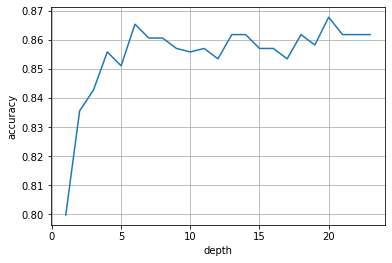

In [261]:
plt = sns.lineplot(data=df_ac, x="depth", y="accuracy")
plt.grid()

# 3 Other model types

# 3.1 Random forest

In [262]:
from sklearn.ensemble import RandomForestClassifier 

In [263]:
model = RandomForestClassifier(random_state=11111, n_estimators=3)

In [264]:
model.fit(features_train, target_train) 

RandomForestClassifier(n_estimators=3, random_state=11111)

In [265]:
result = model.score(features_valid, target_valid) 
print(result)

0.8688915375446961


In [266]:
from tqdm.notebook import tqdm

In [267]:
best_model = None
best_result = 0

for est in tqdm(range(1, 18)):
    for depth in range(1, 18): 
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model.fit(features_train, target_train) 
        result = model.score(features_valid, target_valid) 
        if result > best_result:
            best_depth = depth
            best_est = est
            best_model = model
            best_result = result
print("Accuracy наилучшей модели на валидационной выборке:", best_result)

print('')
print('best_depth =', best_depth)
print('best_est =', best_est)

  0%|          | 0/17 [00:00<?, ?it/s]

Accuracy наилучшей модели на валидационной выборке: 0.8903456495828367

best_depth = 17
best_est = 14


# 3.2 Logistic regression

In [268]:
from sklearn.linear_model import LogisticRegression 

In [269]:
#liblinear
#lbfgs
iterat = 1000
model = LogisticRegression(solver='liblinear', max_iter=iterat) 
model.fit(features_train, target_train) 

result = model.score(features_valid, target_valid)
    
print('result :', result)   

result : 0.8581644815256257


# Conclusion: Random forest provides the best accuracy vs Decision tree and Logistic regression

# 3.3 Regression

In [270]:
from sklearn.metrics import mean_squared_error 

In [272]:
df=pd.read_excel('check.xlsx')

In [273]:
# Define the central point as a tuple of (latitude, longitude)
central_point = (56.951599754910994, 24.113290094982993)  # Note that order is (lat, lon)

# Define a function to calculate the distance
def calculate_distance(row):
   obj_point = (row['lat'], row['lon'])
   return great_circle(central_point, obj_point).km

# Apply the function to create a new column 'distance_to_center_km'
df['distance_to_center_km'] = df.apply(calculate_distance, axis=1)

In [274]:
# Define the central point as a tuple of (latitude, longitude)
central_point = (56.92200101647137, 23.97974797600975)  # Note that order is (lat, lon)

# Define a function to calculate the distance
def calculate_distance(row):
   obj_point = (row['lat'], row['lon'])
   return great_circle(central_point, obj_point).km

# Apply the function to create a new column 'distance_to_center_km'
df['distance_to_airport_km'] = df.apply(calculate_distance, axis=1)

In [275]:
df=df.drop(['Unnamed: 0','district', 'street','data_street', 'seria','house_type','facilities','price_per_sqm','house_seria_general','floor_total','street_name','street_number', 'rooms'],axis=1)

In [276]:
df_train, df_valid=train_test_split(df,test_size=0.25,random_state=11111)

features_train=df_train.drop(['price'], axis=1)
target_train=df_train['price']

features_valid=df_valid.drop(['price'], axis=1)
target_valid=df_valid['price']

# 3.4 Decision tree in regression

In [277]:
from sklearn.tree import DecisionTreeRegressor

In [278]:
best_model = None
best_result = 9999999999999999999999
for depth in range(1, 24):
    model = DecisionTreeRegressor(random_state=11111, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    
    result = mean_squared_error(target_valid, predictions_valid)**0.5 
    if result < best_result:
        best_model = model
        best_result = result/1000

print("RMSE best model on the validation set:", best_result)

RMSE best model on the validation set: 80.9681400288584


# 3.5 Random forest in regression

In [279]:
from sklearn.ensemble import RandomForestRegressor

In [280]:
best_model = None
best_result = 9999999999999999999999

for est in tqdm(range(10, 51, 10)):
    for depth in range (1, 11):
        model = RandomForestRegressor(random_state=11111, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train) 
        predictions_valid = model.predict(features_valid) 
        result = mean_squared_error(target_valid, predictions_valid)**0.5 
        if result < best_result:
            best_model = model
            best_result = result/1000

print("RMSE best model on the validation set:", best_result)

  0%|          | 0/5 [00:00<?, ?it/s]

RMSE best model on the validation set: 79.48895140530398


# 3.6 Linear regression

In [281]:
from sklearn.linear_model import LinearRegression

In [282]:
model = LinearRegression()
model.fit(features_train, target_train) 
predictions_valid = model.predict(features_valid) 

result = mean_squared_error(target_valid, predictions_valid)**0.5 /1000
print("RMSE best model on the validation set:", result)

RMSE best model on the validation set: 66.32449949394402


# Conclusion: Linear regression has the lowest RMSE vs Decision tree in regression and Random forest in regression